<a href="https://colab.research.google.com/github/nilperezFI/FIA-TP5/blob/main/TrabajoPracticoFIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos librerías

In [8]:
install.packages('lubridate')#para trabajar con fechas
install.packages('ggplot2')#Para graficos
install.packages('ggdist')#Para graficos (histogramas)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importamos librerías

In [9]:
library(lubridate)
library(ggplot2)
library(ggdist)
library(dplyr)

In [4]:
# Creamos un df con cada archivo .csv
df_credit_card <- read.csv("/content/Credit_card.csv")
df_credit_card_label <- read.csv("/content/Credit_card_label.csv")

In [10]:
head(df_credit_card)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,-18772,365243,1,0,0,0,,2
2,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,,2
3,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,NA,-586,1,1,1,0,,2
4,5009749,F,Y,N,0,NA,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,,2
5,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,,2
6,5009753,,Y,N,0,315000,Pensioner,Higher education,Married,House / apartment,-13557,-586,1,1,1,0,,2


In [11]:
summary(df_credit_card)

     Ind_ID           GENDER           Car_Owner         Propert_Owner     
 Min.   :5008827   Length:1548        Length:1548        Length:1548       
 1st Qu.:5045070   Class :character   Class :character   Class :character  
 Median :5078842   Mode  :character   Mode  :character   Mode  :character  
 Mean   :5078920                                                           
 3rd Qu.:5115673                                                           
 Max.   :5150412                                                           
                                                                           
    CHILDREN       Annual_income     Type_Income         EDUCATION        
 Min.   : 0.0000   Min.   :  33750   Length:1548        Length:1548       
 1st Qu.: 0.0000   1st Qu.: 121500   Class :character   Class :character  
 Median : 0.0000   Median : 166500   Mode  :character   Mode  :character  
 Mean   : 0.4128   Mean   : 191399                                        
 3rd Qu.: 1.0000 

In [12]:
head(df_credit_card_label)

,Ind_ID,label
,<int>,<int>
1,5008827,1
2,5009744,1
3,5009746,1
4,5009749,1
5,5009752,1
6,5009753,1


In [13]:
str(df_credit_card)

'data.frame':	1548 obs. of  18 variables:
 $ Ind_ID         : int  5008827 5009744 5009746 5009749 5009752 5009753 5009754 5009894 5010864 5010868 ...
 $ GENDER         : chr  "M" "F" "F" "F" ...
 $ Car_Owner      : chr  "Y" "Y" "Y" "Y" ...
 $ Propert_Owner  : chr  "Y" "N" "N" "N" ...
 $ CHILDREN       : int  0 0 0 0 0 0 0 0 1 1 ...
 $ Annual_income  : num  180000 315000 315000 NA 315000 315000 315000 180000 450000 450000 ...
 $ Type_Income    : chr  "Pensioner" "Commercial associate" "Commercial associate" "Commercial associate" ...
 $ EDUCATION      : chr  "Higher education" "Higher education" "Higher education" "Higher education" ...
 $ Marital_status : chr  "Married" "Married" "Married" "Married" ...
 $ Housing_type   : chr  "House / apartment" "House / apartment" "House / apartment" "House / apartment" ...
 $ Birthday_count : int  -18772 -13557 NA -13557 -13557 -13557 -13557 -22134 -18173 -18173 ...
 $ Employed_days  : int  365243 -586 -586 -586 -586 -586 -586 365243 -678 -678 ...

In [14]:
nrow(df_credit_card)  # Número de filas en el data frame
ncol(df_credit_card)  # Número de columnas en el data frame


[1] 1548

[1] 18

In [15]:
nrow(df_credit_card_label)  # Número de filas en el data frame
ncol(df_credit_card_label)  # Número de columnas en el data frame


[1] 1548

[1] 2

In [16]:
# Unimos los df por el ID común
df_ccard <- merge(df_credit_card, df_credit_card_label, by = "Ind_ID")

In [ ]:
head(df_ccard)

In [ ]:
tail(df_ccard)

In [ ]:
summary(df_ccard)

Comenzamos con la limpieza

In [ ]:
# Vemos si hay campos nulos en alguna columna
colSums(is.na(df_ccard))

In [19]:
#Eliminamos las filas que tienen valores nulos (es una de las opciones)
df_ccard <- na.omit(df_ccard)

In [ ]:
nrow(df_ccard)

In [ ]:
#Contamos los valores en blanco en cada columna
#Usamos la función de resumen de la librería dplyr
df_ccard %>% summarise_all(~ sum(. == ''))


In [22]:
df_ccard <- subset(df_ccard, GENDER != '')

In [24]:
df_ccard <- subset(df_ccard, select = -Type_Occupation)


In [ ]:
# Identificar las variables numéricas
num_var <- names(df_ccard)[sapply(df_ccard, is.numeric)]

# Imprimir las variables numéricas
print(num_var)

Trabajamos con las fechas

In [26]:
#Las fechas están expresadas en un sistema de contabilidad temporal en el que el día actual se representa como "0",
# y los días anteriores se cuentan hacia atrás en números negativos
#Creamos la comlumna BirthdayDate con la fecha de nacimiento

fecha_actual <- Sys.Date()
df_ccard$Birthday_date <- fecha_actual + days(df_ccard$Birthday_count)

In [34]:
head(df_ccard)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Birthday_date,age,Employed
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<date>,<dbl>,<chr>
1,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,2,1,1972-06-01,51,n
2,5008865,F,Y,Y,2,135000,Working,Secondary / secondary special,Married,House / apartment,-3173,1,0,0,0,4,0,1980-08-29,43,y
3,5008889,F,N,Y,0,247500,Commercial associate,Higher education,Separated,Rented apartment,-1347,1,0,0,0,1,0,1977-03-23,46,y
4,5009000,M,Y,Y,0,157500,Working,Secondary / secondary special,Married,House / apartment,-828,1,0,0,0,2,0,1996-08-19,27,y
5,5009023,F,N,Y,2,216000,State servant,Higher education,Married,House / apartment,-3112,1,0,0,1,4,0,1981-07-12,42,y
6,5009053,F,N,Y,2,202500,Working,Higher education,Married,House / apartment,-2289,1,0,0,1,4,0,1993-09-14,30,y


In [28]:
#Creamos la columna age(edad)
df_ccard$age <- floor(as.numeric(difftime(Sys.Date(), df_ccard$Birthday_date, units = "days") / 365.25))

In [31]:
df_ccard <- subset(df_ccard, select = -Birthday_count)

Empleado/Desempleado

In [32]:
df_ccard$Employed <- ifelse(df_ccard$Employed_days > 0, 'n', 'y')

In [ ]:
head(df_ccard)

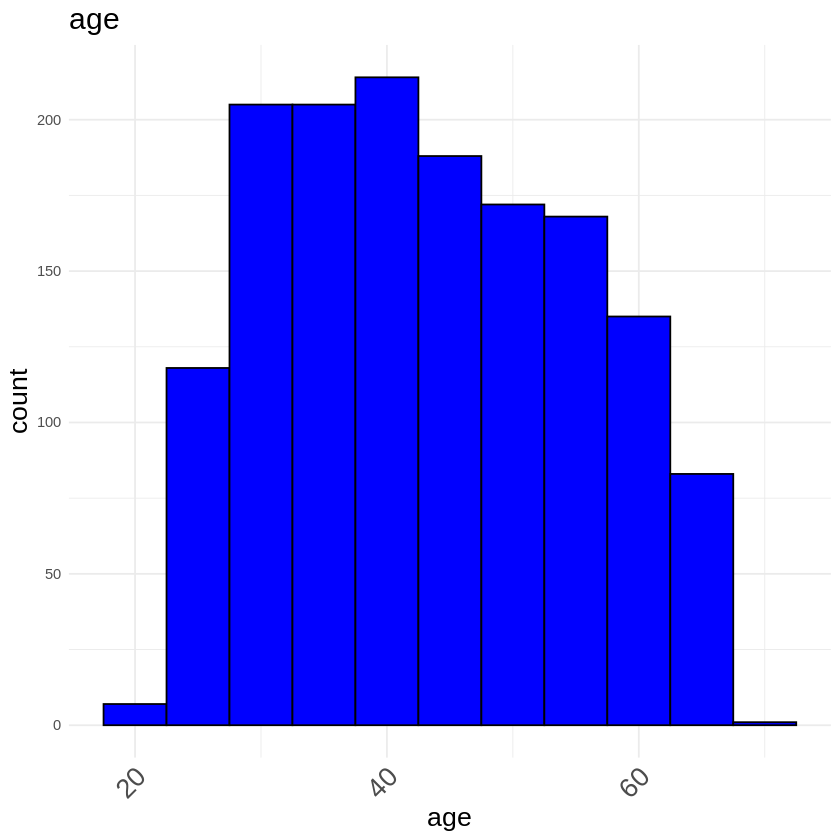

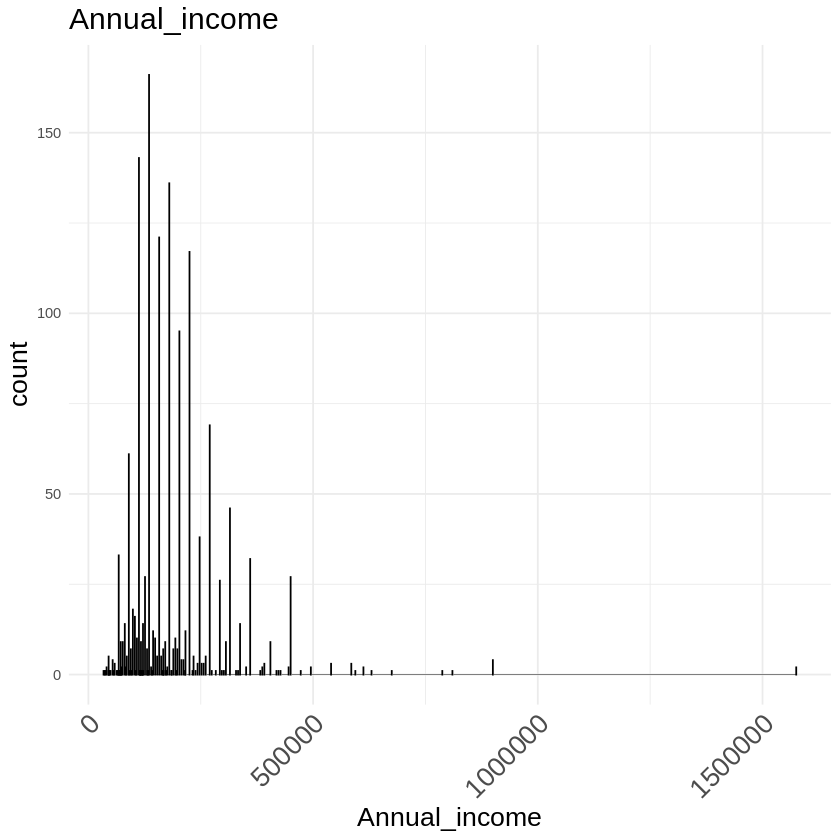

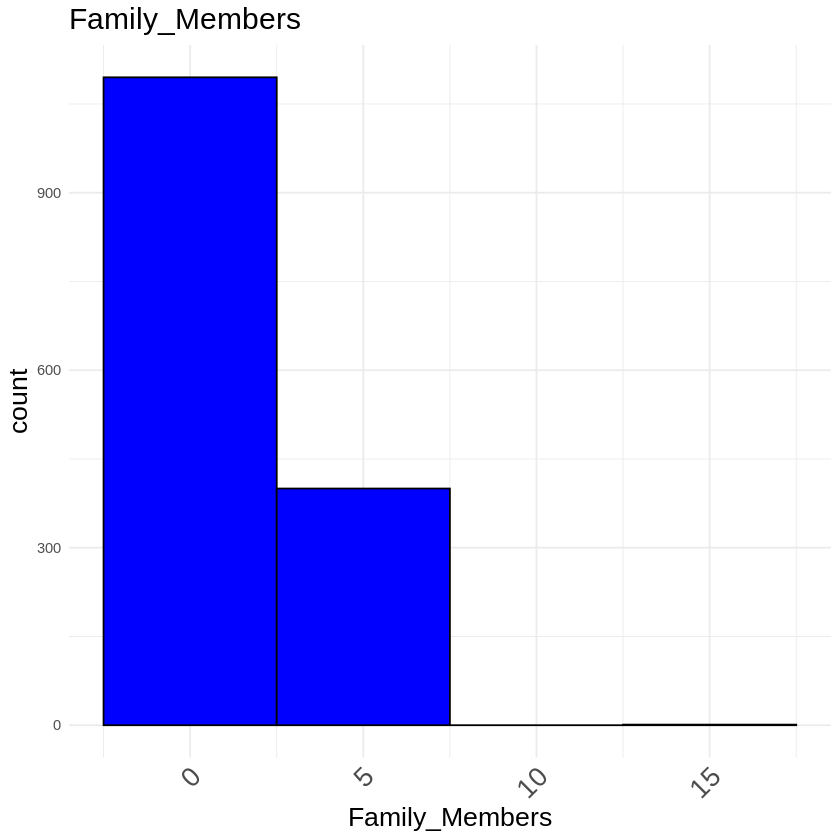

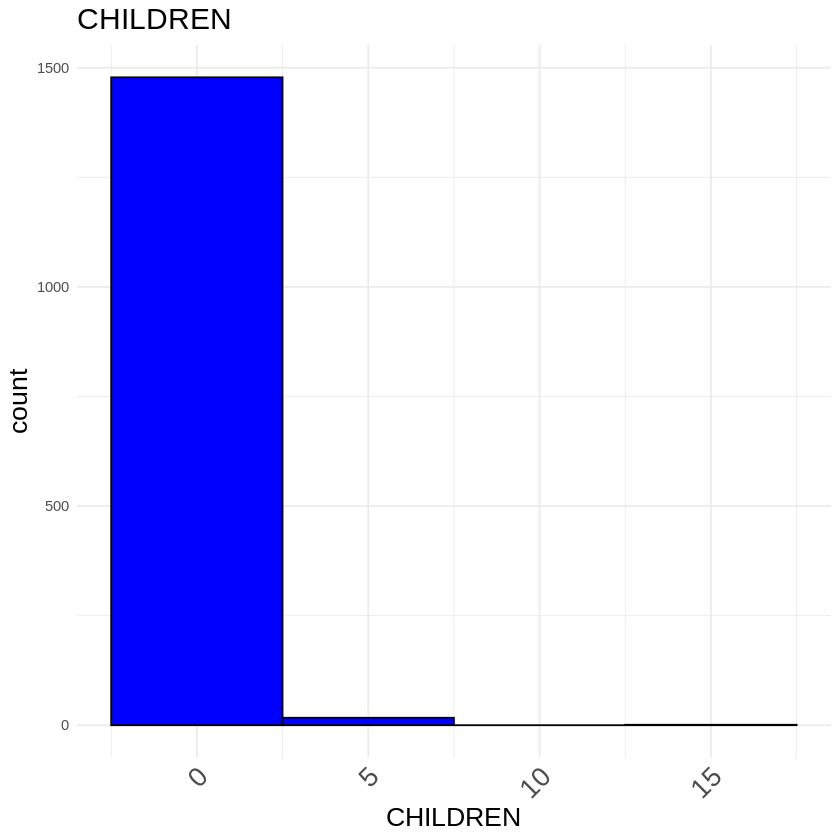

In [35]:
# Definimos las columnas numéricas que vamos a graficar
numeric_columns <- c("age", "Annual_income", "Family_Members", "CHILDREN")

theme_set(theme_minimal())

for (column in numeric_columns) {
  p <- ggplot(df_ccard, aes(x = .data[[column]])) +
    geom_histogram(binwidth = 5, fill = "blue", color = "black") +
    labs(title = column) +
    theme(
      axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
      axis.title = element_text(size = 16),
      plot.title = element_text(size = 18),
      legend.position = "none"
    )

  print(p)
}


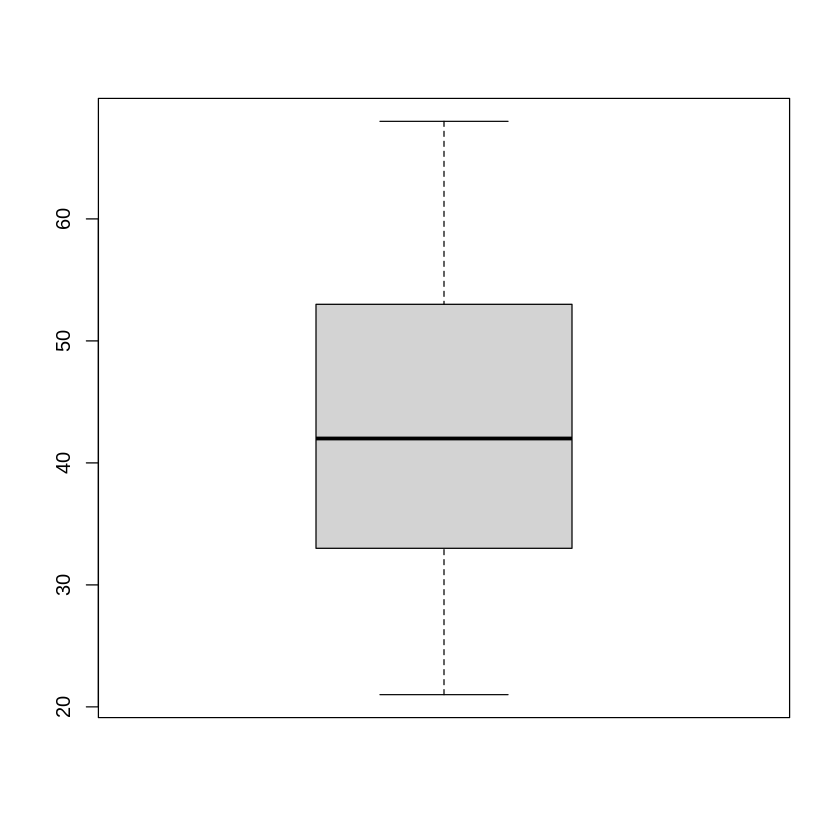

In [37]:
boxplot(df_ccard$age)

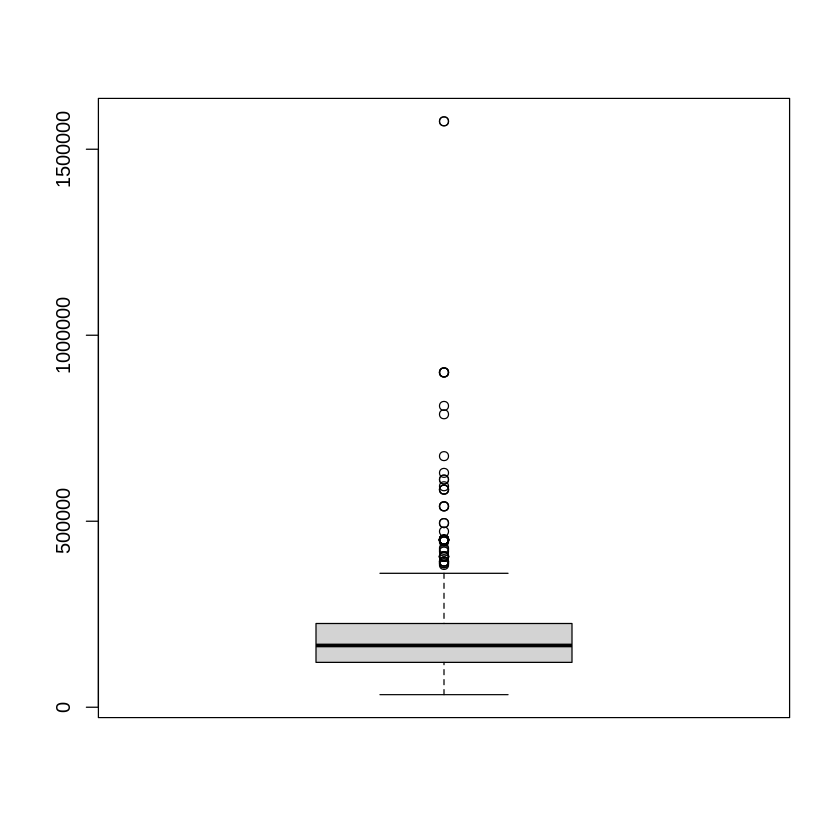

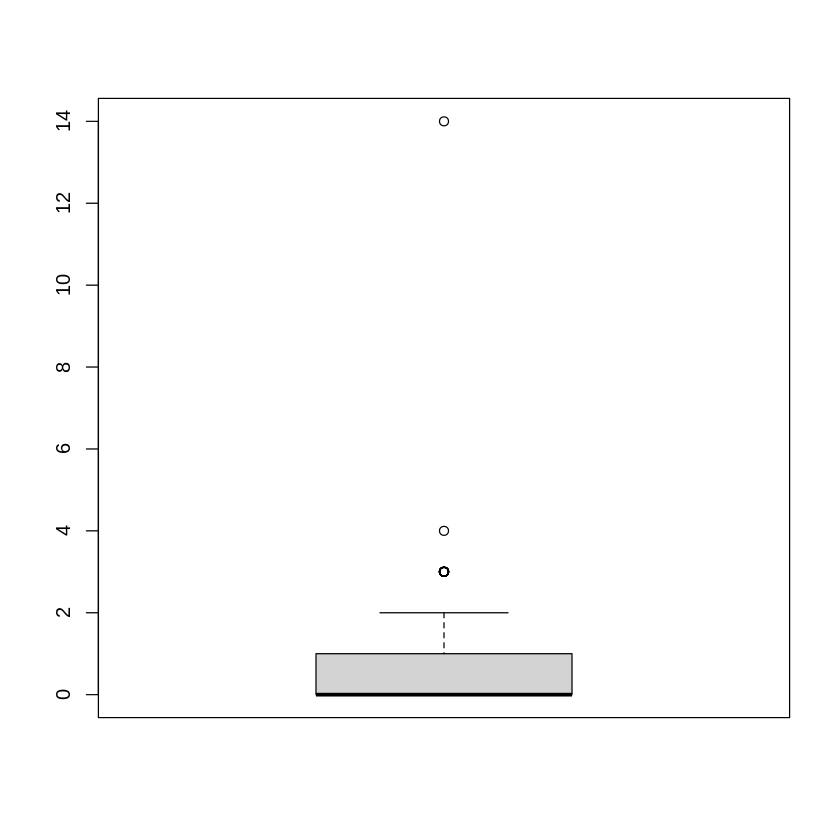

In [36]:
boxplot(df_ccard$Annual_income)
boxplot(df_ccard$CHILDREN)

In [38]:
cat_var <- names(df_ccard)[sapply(df_ccard, is.character)]

In [39]:
cat_var

[1] "GENDER"         "Car_Owner"      "Propert_Owner"  "Type_Income"   
[5] "EDUCATION"      "Marital_status" "Housing_type"   "Employed"

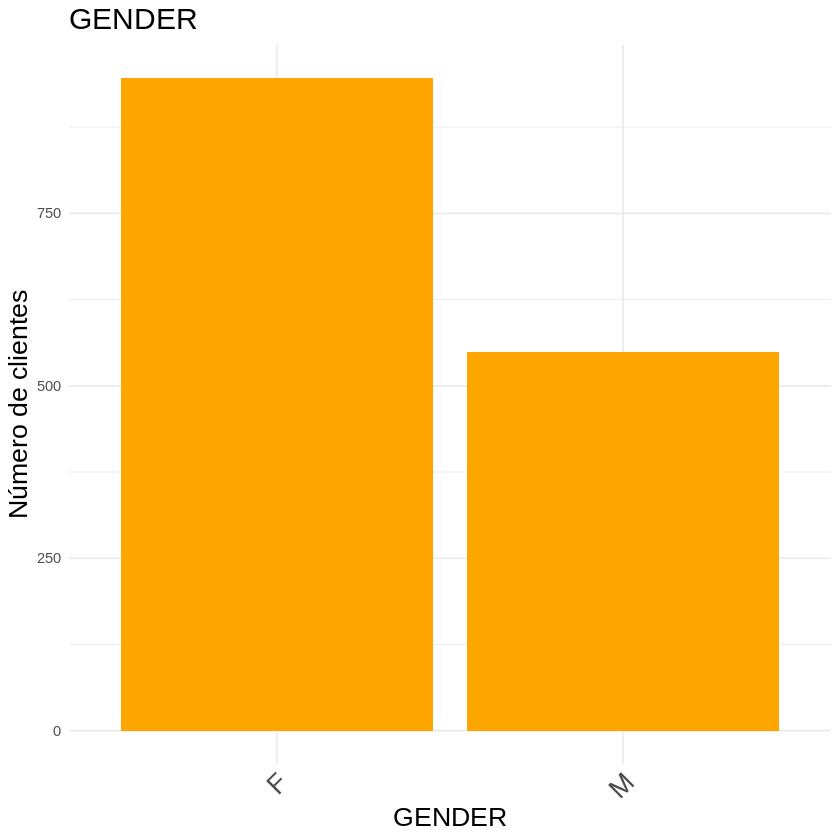

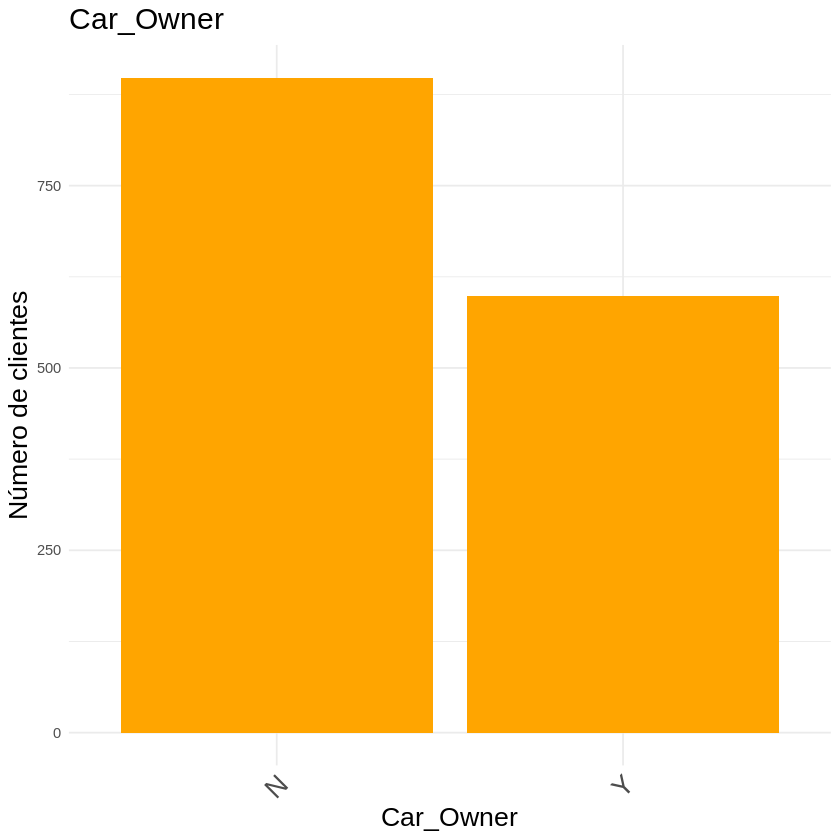

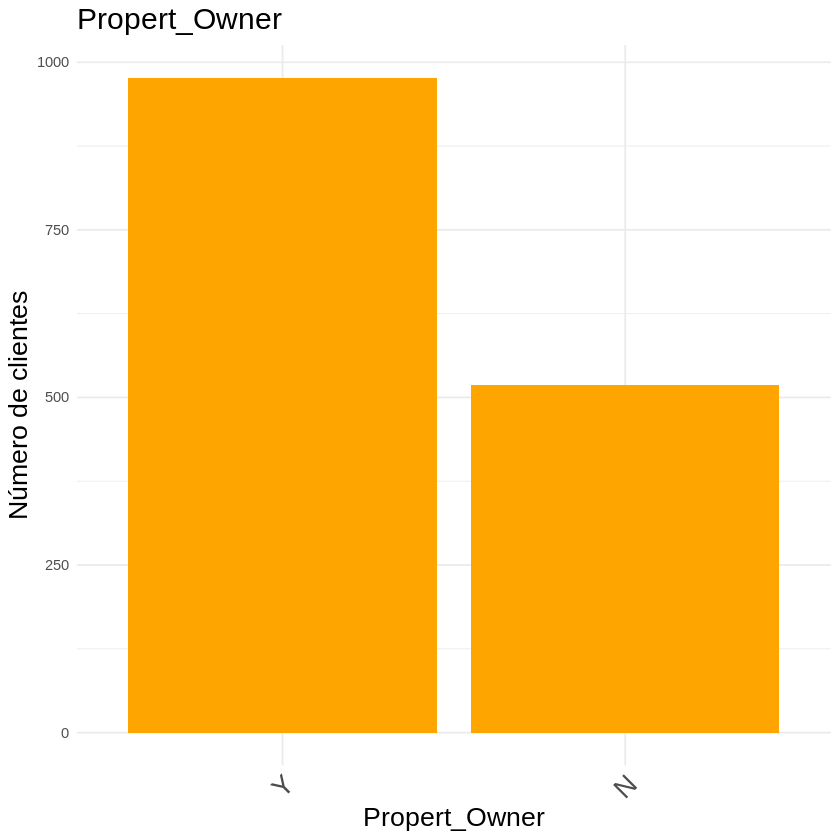

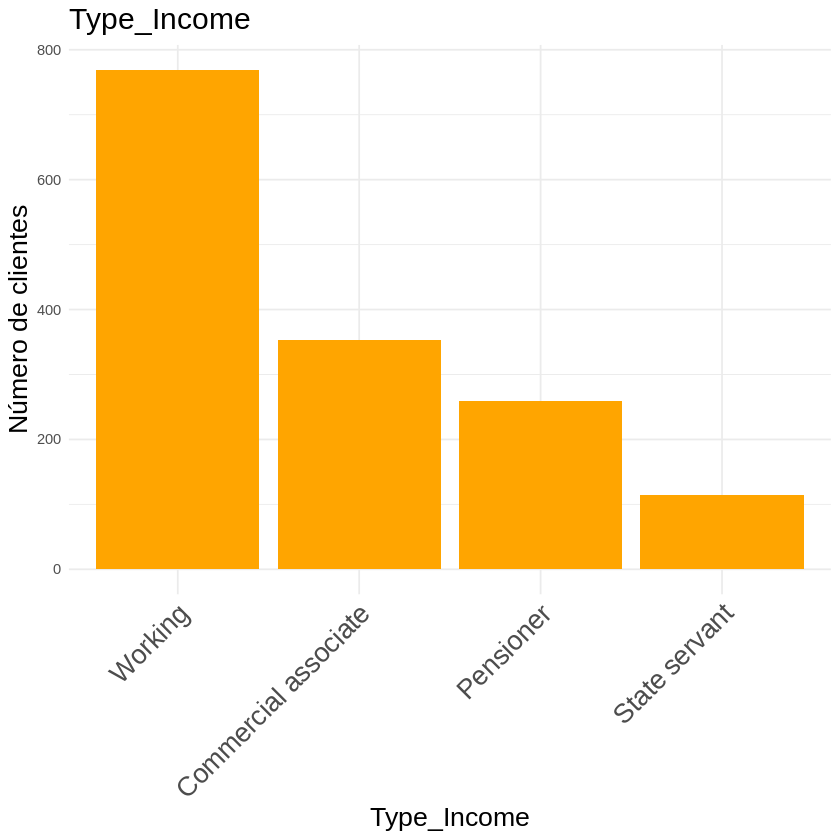

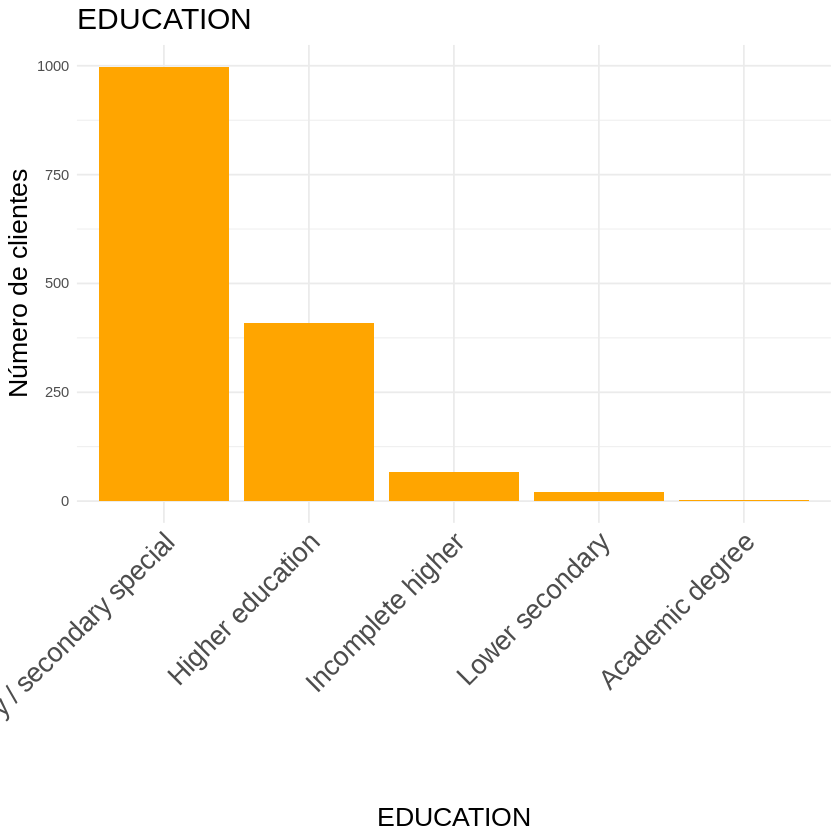

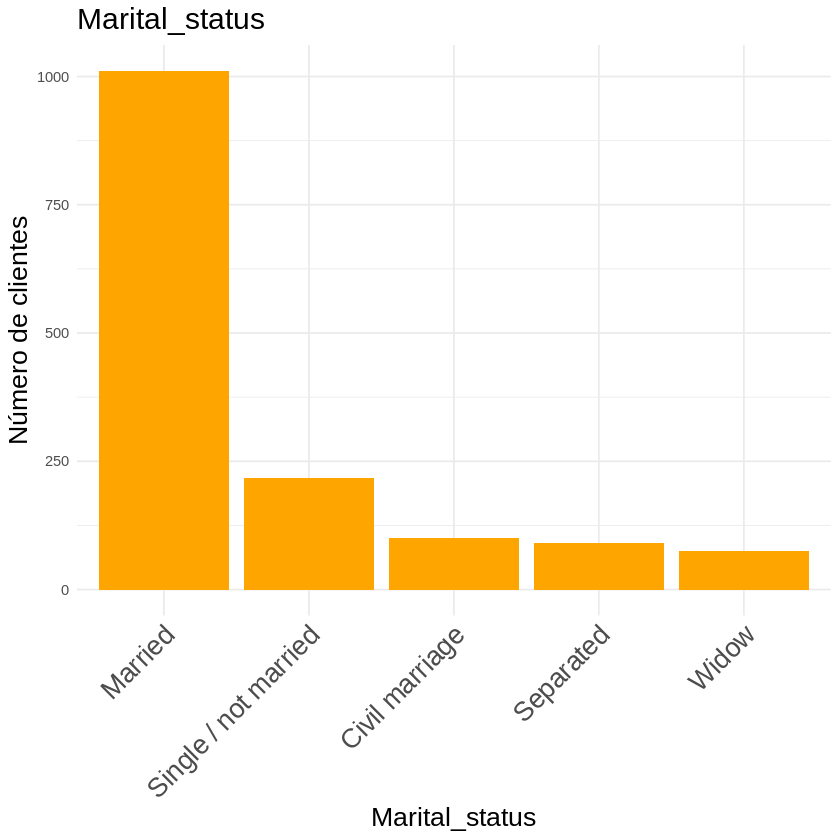

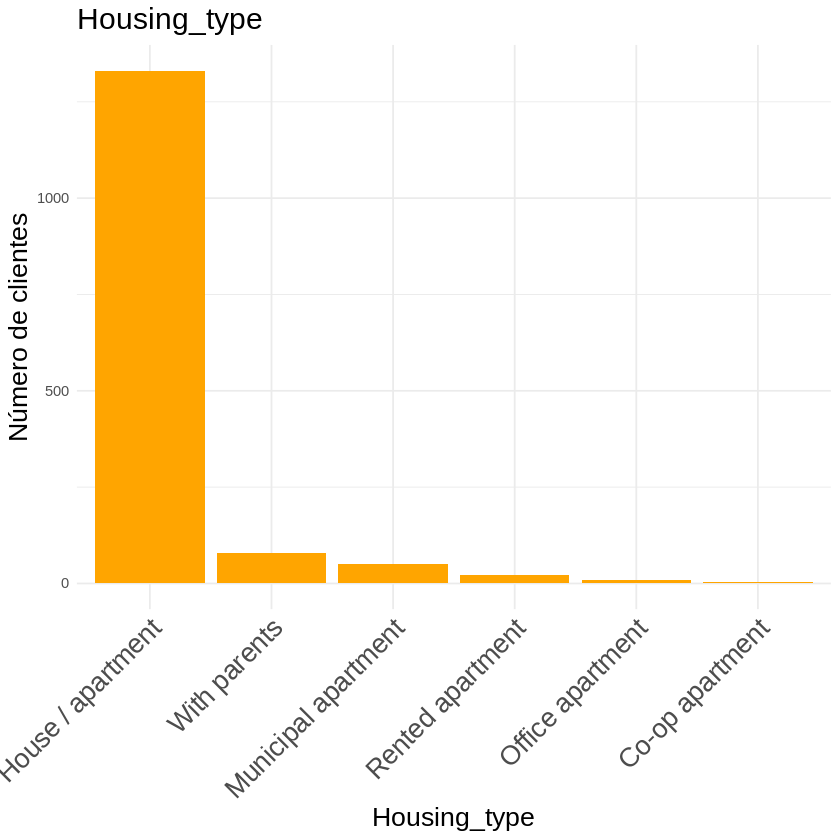

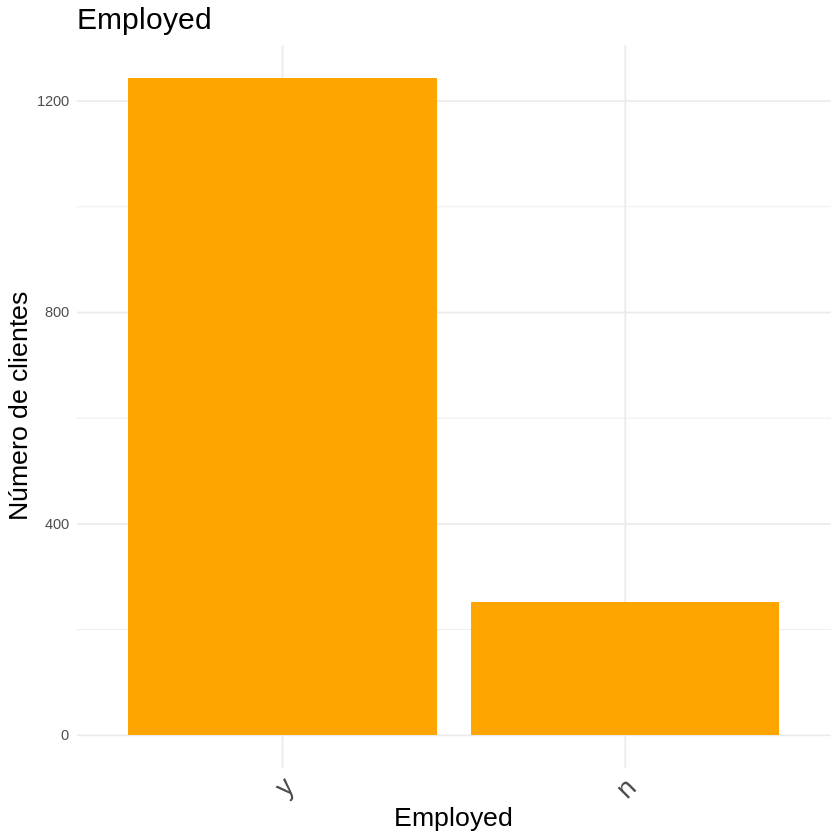

In [40]:
# Identificar las variables categóricas
cat_var <- names(df_ccard)[sapply(df_ccard, is.character)]

# Crear gráficos de barras para cada variable categórica
for (column in cat_var) {
  # Crear un nuevo gráfico
  p <- ggplot(df_ccard, aes(x = reorder(.data[[column]], -table(.data[[column]])[.data[[column]]]))) +
    geom_bar(fill = "orange") +  # Color de las barras
    labs(x = column, y = "Número de clientes", title = column) +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 16, angle = 45, hjust = 1),  # Tamaño de fuente para etiquetas x
        axis.title = element_text(size = 16),    # Tamaño de fuente para títulos de ejes
        plot.title = element_text(size = 18)) # Tamaño de fuente y ángulo de las etiquetas x

  # Mostrar el gráfico
  print(p)
}



Chequeamos desbalanceo

In [41]:
table(df_ccard$label)


   0    1 
1336  160 

In [40]:
prop.table(table(df_ccard$label)) * 100


       0        1 
89.30481 10.69519 

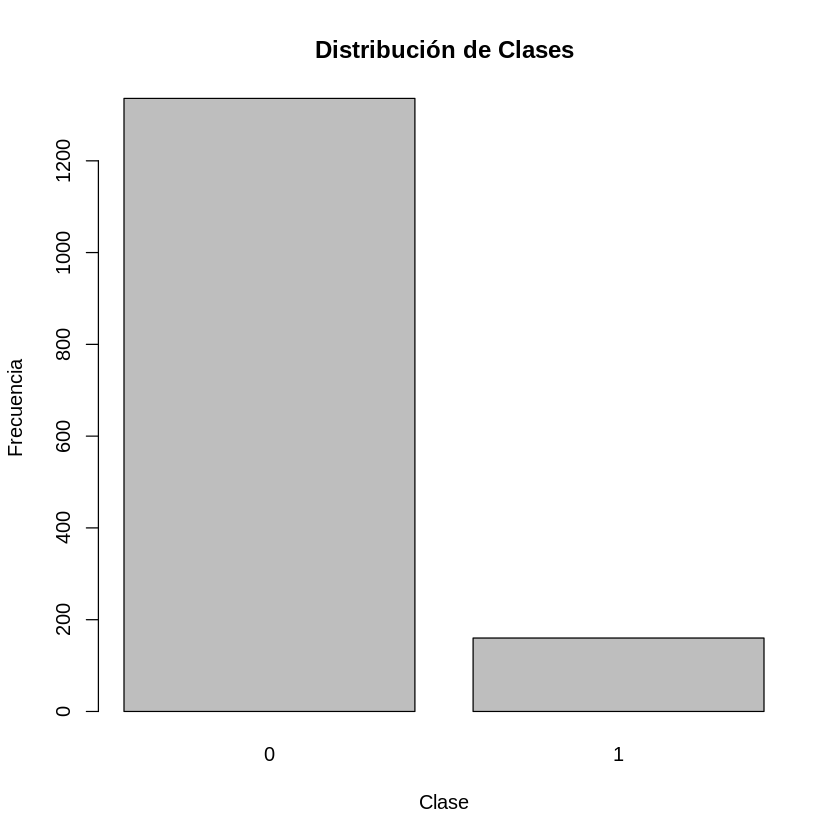

In [43]:
barplot(table(df_ccard$label), main = "Distribución de Clases", xlab = "Clase", ylab = "Frecuencia")


In [44]:
write.csv(df_ccard, file = '/content/Credit_card_limpio.csv')